## 🧤 Goalkeeper Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data
df = pd.read_csv("players_data-2024_2025.csv")
df.fillna(0, inplace=True)

## Distribution of Save %

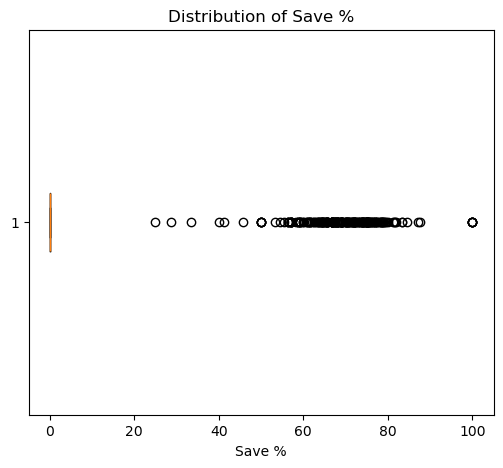

In [13]:
Comp = df['Comp'].value_counts().head(5).index
df_top5_comp = df[df['Comp'].isin(Comp)]


plt.figure(figsize=(6,5))
plt.boxplot(df_top5_comp['Save%'].dropna(), vert=False)
plt.xlabel("Save %")
plt.title("Distribution of Save %")
plt.show()

## Top 10 Goalkeepers by Saves

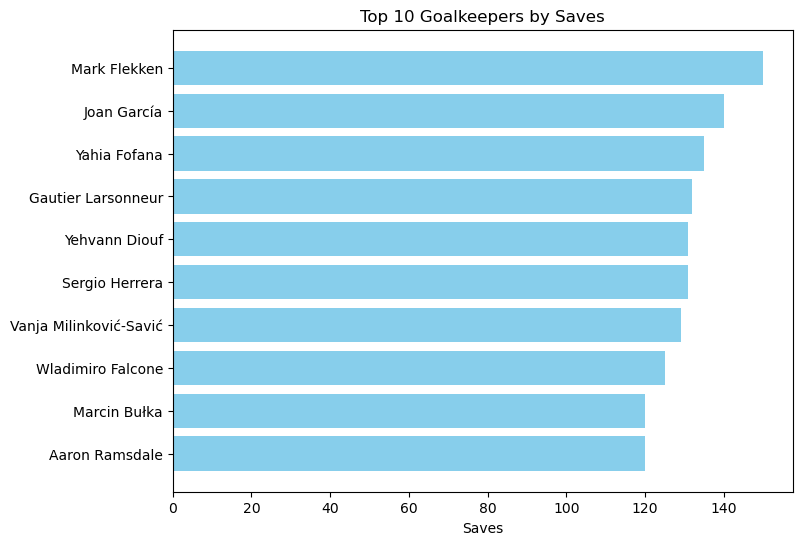

In [15]:
top_saves = df_top5_comp[['Player','Saves']].sort_values(by='Saves', ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.barh(top_saves['Player'][::-1], top_saves['Saves'][::-1], color='skyblue')
plt.xlabel("Saves")
plt.title("Top 10 Goalkeepers by Saves")
plt.show()


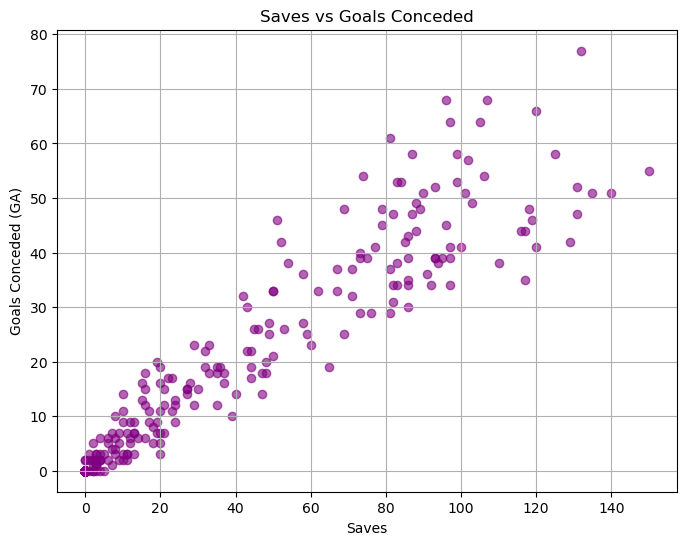

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df_top5_comp['Saves'], df_top5_comp['GA'], alpha=0.6, color='purple')
plt.xlabel("Saves")
plt.ylabel("Goals Conceded (GA)")
plt.title("Saves vs Goals Conceded")
plt.grid(True)
plt.show()
